In [ ]:
import pandas as pd


In [ ]:
data=pd.read_csv("temp data.csv")

In [ ]:
data.head()

,Year,Month,Day,Maximum temperature (Degree C),Minimum temperature (Degree C)
0,1859,1,1,24.4,14.5
1,1859,1,2,24.4,15.7
2,1859,1,3,24.2,15.3
3,1859,1,4,24.7,17.4
4,1859,1,5,24.6,16.9


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
data=data.dropna()

In [ ]:
data['date']=pd.to_datetime(data[['Year','Month','Day']])
data.set_index('date',inplace=True)
drop_cols=[0,1,2]
data.drop(data.columns[drop_cols],axis=1,inplace=True)
data.rename(columns={'Maximum temperature (Degree C)':'Tmax','Minimum temperature (Degree C)':'Tmin'},inplace=True)


<ipython-input-6-5030eb7fb8ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date']=pd.to_datetime(data[['Year','Month','Day']])
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [ ]:
data.head()

,Tmax,Tmin
date,,
1859-01-01,24.4,14.5
1859-01-02,24.4,15.7
1859-01-03,24.2,15.3
1859-01-04,24.7,17.4
1859-01-05,24.6,16.9


In [ ]:
data['T']=(data['Tmax']+data['Tmin'])/2

<ipython-input-8-94499ce5f3bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['T']=(data['Tmax']+data['Tmin'])/2


In [ ]:
data.head()

,Tmax,Tmin,T
date,,,
1859-01-01,24.4,14.5,19.45
1859-01-02,24.4,15.7,20.05
1859-01-03,24.2,15.3,19.75
1859-01-04,24.7,17.4,21.05
1859-01-05,24.6,16.9,20.75


In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.ar_model import AutoReg,ar_select_order,AutoRegResults

In [ ]:

data

,Tmax,Tmin,T
date,,,
1859-01-01,24.4,14.5,19.45
1859-01-02,24.4,15.7,20.05
1859-01-03,24.2,15.3,19.75
1859-01-04,24.7,17.4,21.05
1859-01-05,24.6,16.9,20.75
...,...,...,...
2020-08-26,19.6,6.8,13.20
2020-08-27,22.2,6.8,14.50
2020-08-28,19.7,10.4,15.05


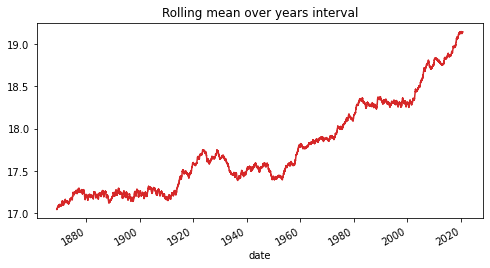

In [ ]:
data['T'].rolling(window=365*10).mean().plot(figsize=(8,4),color='tab:red',title='Rolling mean over years interval')

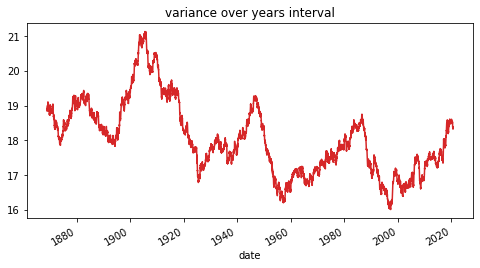

In [ ]:
data['T'].rolling(window=365*10).var().plot(figsize=(8,4),color='tab:red',title='variance over years interval')

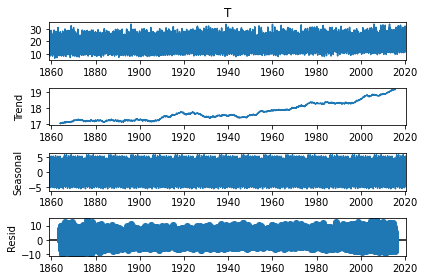

In [ ]:
decompose_result=seasonal_decompose(data['T'],model='additive',period=int(365*10))
trend=decompose_result.trend
seasonal=decompose_result.seasonal
residual=decompose_result.resid

decompose_result.plot()
plt.show()

(-15.0, 15.0)

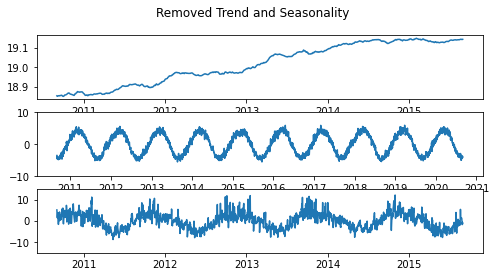

In [ ]:
years_examine=365*10
fig,axs=plt.subplots(3,figsize=(8,4))
fig.suptitle('Removed Trend and Seasonality')
axs[0].plot(trend[-years_examine:])
axs[1].plot(seasonal[-years_examine:])
axs[1].set_ylim([-10,10])
axs[2].plot(residual[-years_examine:])
axs[2].set_ylim([-15,15])

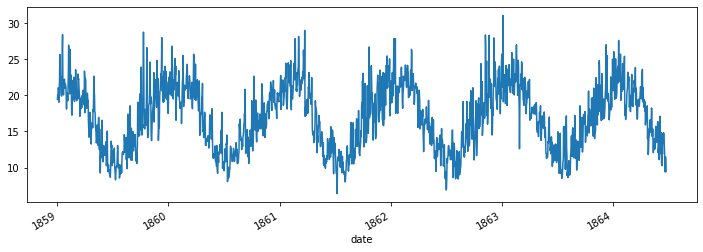

In [ ]:
data['T'][:2000].plot(figsize=(12,4))

In [ ]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scipy
temp_t = data['T'].copy(deep=True)
temp_t = temp_t.to_frame()
def model(x, a,b,c,d):
    omega = 2*np.pi/365.25   
    return  a + b*x + c*np.sin(omega*x + d)
first_ord = temp_t.index.map(dt.datetime.toordinal)[0]
temp_t.index=temp_t.index.map(dt.datetime.toordinal)
params_all,cov = scipy.optimize.curve_fit(model,temp_t.index-first_ord, temp_t['T'])
temp_t['model']=16.8+0.0000331*(temp_t.index-first_ord)+5.05*np.sin((2*np.pi/365.25)*(temp_t.index-first_ord)+1.26)
temp_t['res']=temp_t['T']-temp_t['model']


In [ ]:
temp_t

,T,model,res
date,,,
678621,19.45,21.608056,-2.158056
678622,20.05,21.633944,-1.583944
678623,19.75,21.658401,-1.908401
678624,21.05,21.681420,-0.631420
678625,20.75,21.702995,-0.952995
...,...,...,...
737663,13.20,14.645040,-1.445040
737664,14.50,14.696175,-0.196175
737665,15.05,14.748510,0.301490


In [ ]:
params_all

array([1.68031864e+01, 3.31383724e-05, 5.04921721e+00, 1.26450227e+00])

T(m)=16.8+(3.31e−05)t+5.05sin((2π365.25)t+1.26)

Euler Discretization of our SDE over the interval between t∈[i−1,i]

Ti–Ti−1=T¯i−T¯i−1+κ(T¯i−1–Ti−1)+σizi Ti−T¯i=Ti−1+T¯i−i–κ(Ti−1–T¯i−1)+σizi Where zt∼N(0,1). Now let’s create a term for when we de-trend and remove seasonality from our original DAT series. Let’s call this transformation Tt^=Tt–Tt¯, therefore we get:

Ti^=T^i−1–κ(T^i−1)+σizi This can be modelled as an AR(1) process:

Ti^=γT^i−1+ei where κ=1–γ, and ei=σizi

In [ ]:
model = AutoReg(temp_t['res'], lags=1)
model_fit  = model.fit()
model_fit.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                    res   No. Observations:                58889
Model:                     AutoReg(1)   Log Likelihood             -122001.972
Method:               Conditional MLE   S.D. of innovations              1.921
Date:                Mon, 26 Dec 2022   AIC                              1.306
Time:                        12:50:52   BIC                              1.306
Sample:                             1   HQIC                             1.306
                                58889                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0019      0.008      0.244      0.807      -0.014       0.017
res.L1         0.5617      0.003    164.773      0.000       0.555       0.568
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7802           +0.0000j            1.7802            0.0000
-----------------------------------------------------------------------------
"""

therefore alpha=1-0.5617=0.438 now, dT(t)=[dT(m)/dt+0.438(T(m)–Tt)]dt+σ(t)dW(t)



In [ ]:
temp_t = data['T'].copy(deep=True)
temp_t = temp_t.to_frame()
first_ord = temp_t.index.map(dt.datetime.toordinal)[0]
temp_vol = data['T'].copy(deep=True).to_frame()
temp_vol['day'] = temp_vol.index.dayofyear
temp_vol['month'] = temp_vol.index.month
vol = temp_vol.groupby(['day'])['T'].agg(['mean','std'])
days = np.array(vol['std'].index)
T_std = np.array(vol['std'].values)

In [ ]:
vol

,mean,std
day,,
1,22.184783,2.286448
2,22.274074,2.310839
3,22.191358,2.386996
4,22.348148,2.495119
5,22.292236,2.662292
...,...,...
362,21.872360,2.547915
363,21.793437,2.409038
364,21.905280,2.342632


In [ ]:
from scipy.integrate import quad
from scipy import stats, interpolate

In [ ]:
def T_model(x, a, b, alpha, theta):
    omega = 2*np.pi/365.25
    T = a + b*x + alpha*np.sin(omega*x + theta)
    return T
def dT_model(x, a, b, alpha, theta):
    omega=2*np.pi/365.25
    dT =  b + alpha*omega*np.cos(omega*x + theta)
    return dT
def spline(knots, x, y):
    x_new = np.linspace(0, 1, knots+2)[1:-1]
    t, c, k = interpolate.splrep(x, y, t=np.quantile(x, x_new), s=3)
    yfit = interpolate.BSpline(t,c, k)(x)
    return yfit
Tbar_params = [16.8, 3.32e-05, 5.05, 1.27]


In [ ]:
def rn_mean(time_arr, vol_arr, Tbars, lamda, kappa):
    """Evaluate the risk neutral integral above for each segment of constant volatility
    Rectangular integration with step size of days
    """
    dt = 1/365.25
    N = len(time_arr)
    mean_intervals = -vol_arr*(1 - np.exp(-kappa*dt))/kappa
    return 18*N - (np.sum(Tbars) - lamda*np.sum(mean_intervals))

def rn_var(time_arr, vol_arr, kappa):
    """Evaluate the risk neutral integral above for each segment of constant volatility
    Rectangular integration with step size of days
    """
    dt = 1/365.25 
    var_arr = np.power(vol_arr,2) 
    var_intervals = var_arr/(2*kappa)*(1-np.exp(-2*kappa*dt))
    cov_sum = 0
    for i, ti in enumerate(time_arr):
        for j, tj in enumerate(time_arr):
            if j > i:
                cov_sum += np.exp(-kappa*(tj-ti)) * var_intervals[i]
    return np.sum(var_intervals) + 2*cov_sum
    
def risk_neutral(trading_dates, Tbar_params, vol_model, first_ord, lamda, kappa=0.438):
    if isinstance(trading_dates, pd.DatetimeIndex):
        trading_date=trading_dates.map(dt.datetime.toordinal)
  
    Tbars = T_model(trading_date-first_ord, *Tbar_params) 
    dTbars = dT_model(trading_date-first_ord, *Tbar_params) 
    mc_temps = pd.DataFrame(data=np.array([Tbars, dTbars]).T,
                            index=trading_dates, columns=['Tbar','dTbar'])
    mc_temps['day'] = mc_temps.index.dayofyear
    mc_temps['vol'] = vol_model[mc_temps['day']-1]
    time_arr = np.array([i/365.25 for i in range(1,len(trading_dates)+1)])
    vol_arr = mc_temps['vol'].values
    mu_rn = rn_mean(time_arr, vol_arr, Tbars, lamda, kappa)
    var_rn = rn_var(time_arr, vol_arr, kappa)
    return mu_rn, var_rn

In [ ]:
volatility = spline(5, days, T_std)
def winter_option(trading_dates, r, alpha, K, tau, opt='c', lamda=0.0):
    """Evaluate the fair value of temperature option in winter
    Based on heating degree days only if the physical probability that 
    the average temperature exceeds the Tref (18 degC) is close to 0 
    """
    mu_rn, var_rn = risk_neutral(trading_dates, Tbar_params, volatility, first_ord, lamda)
    disc = np.exp(-r*tau)
    vol_rn = np.sqrt(var_rn)
    zt = (K - mu_rn)/vol_rn
    exp = np.exp(-zt**2/2)
    if opt == 'c':
        return alpha*disc*((mu_rn - K)*stats.norm.cdf(-zt) + vol_rn*exp/np.sqrt(2*np.pi))
    else:
        exp2 = np.exp(-mu_rn**2/(2*vol_rn**2))
        return alpha*disc*((K - mu_rn)*(stats.norm.cdf(zt) - stats.norm.cdf(-mu_rn/vol_rn)) +
                           vol_rn/np.sqrt(2*np.pi)*(exp-exp2))
trading_dates = pd.date_range(start='2023-06-01', end='2023-08-31', freq='D')
r=0.05
K=300
alpha=2500
def years_between(d1, d2):
    d1 = dt.datetime.strptime(d1, "%Y-%m-%d")
    d2 = dt.datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)/365.25
start ='2023-06-01'
end = '2023-08-31'
tau = years_between(start, end)
print('Start Valuation Date:', start, 
      '\nEnd of Contract Date:', end, 
      '\nYears between Dates :', round(tau,3))
print('Call Price: ', round(winter_option(trading_dates, r, alpha, K, tau, 'c'),2))
print('Put Price : ', round(winter_option(trading_dates, r, alpha, K, tau, 'p'),2))

Start Valuation Date: 2023-06-01 
End of Contract Date: 2023-08-31 
Years between Dates : 0.249
Call Price:  106520.74
Put Price :  0.0


In [ ]:
first_ord

678621